In [44]:
%matplotlib inline

In [45]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import math
ewma = pd.stats.moments.ewma

In [48]:
def draw_experiment(id, ax, headers):
    """
        Draw results of single experiment. Experiment data is loaded from CSV file and selected headers are plotted in time (epochs)
    """
    df = pd.read_csv(id["path"])
    fig = ewma(df[headers], span=40).plot(ax=ax)

    fig.set_xlabel("epochs")
    fig.set_xlabel("error rate")
    fig.set_title(id["title"])
    
    return fig

def draw_experiments(exps, headers, per_line=2):
    rows = int(math.ceil(len(exps)/per_line))
    lines = max(min(per_line, len(exps)), 2) # Need at least 2 else we get: "'AxesSubplot' object has no attribute 'shape'"

    fig, ax = plt.subplots(nrows=rows, ncols=lines)
    fig.set_size_inches(20, 14, forward=True)

    for i in range(len(exps)):
        ix = np.unravel_index(i, ax.shape)
        draw_experiment(exps[i], ax[ix], headers)
        
    plt.tight_layout()

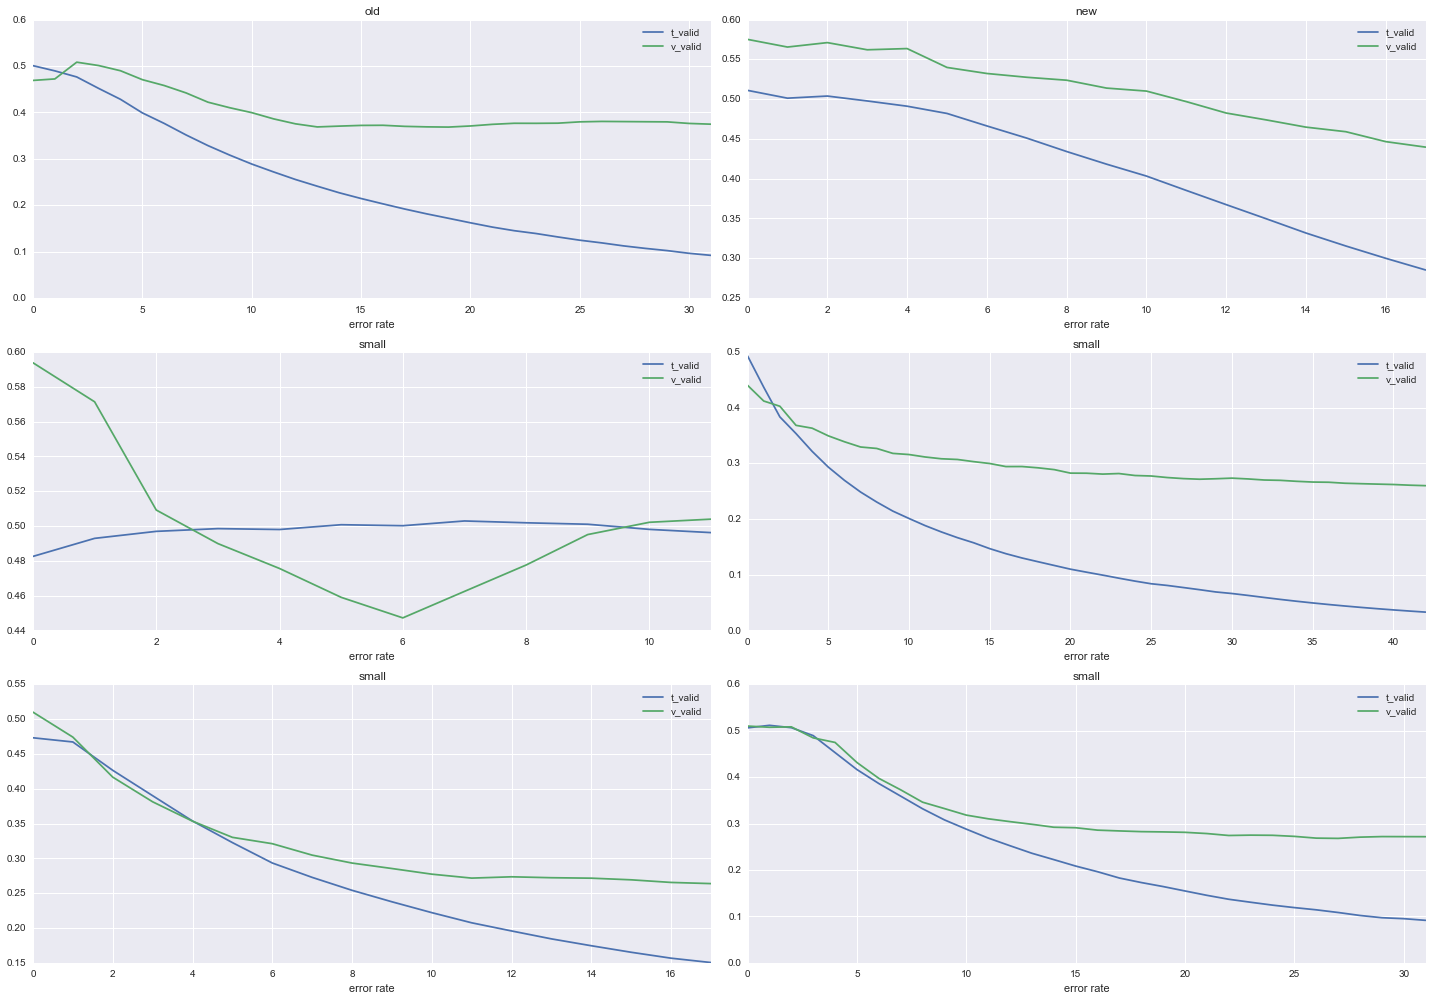

In [50]:
draw_experiments([
    dict(path="log/151223_214813_exp.txt", title="old"),
    dict(path="log/151223_220451_exp.txt", title="new"),
    dict(path="log/151223_221233_exp.txt", title="small"),
    dict(path="log/151223_230939_exp.txt", title="small"),
    dict(path="log/151223_234234_exp.txt", title="small"),
    dict(path="log/151223_235051_exp.txt", title="small"),
        
], ["t_valid", "v_valid"], 2)